# EDA

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config IPCompleter.greedy=True

## UPLOAD DATA

In [21]:
path = '../../'

In [22]:
name_cat = 'cat_result_quality.pickle'
name_num = 'num_result_quality.pickle'

In [23]:
cat = pd.read_pickle(path + '/02_Data/03_Work/' + name_cat)
num = pd.read_pickle(path + '/02_Data/03_Work/' + name_num)

## EDA CATEGORICAL

### Statistical Analysis

In [24]:
cat.columns

Index(['empleo', 'antigüedad_empleo', 'ingresos_verificados', 'rating',
       'vivienda', 'descripcion', 'finalidad', 'num_cuotas', 'estado'],
      dtype='object')

In [25]:
variables = ['antigüedad_empleo', 'ingresos_verificados', 'rating', 'vivienda',
       'finalidad', 'num_cuotas', 'estado']

In [26]:
def frec_cat(df_cat):
    result = df_cat[variables].apply(lambda x: x.value_counts(normalize = True)).T.stack()\
                .to_frame().reset_index()\
                .rename(columns={'level_0':'Variable','level_1':'Value',0: "Frec"})\
                .sort_values(by = ['Variable','Frec'])
    return(result)

In [27]:
frec_cat(cat)

,Variable,Value,Frec
9,antigüedad_empleo,9 years,0.035332
8,antigüedad_empleo,8 years,0.041184
7,antigüedad_empleo,7 years,0.041644
6,antigüedad_empleo,6 years,0.045454
4,antigüedad_empleo,4 years,0.060205
5,antigüedad_empleo,5 years,0.062239
11,antigüedad_empleo,anknown,0.064137
0,antigüedad_empleo,1 year,0.065632
3,antigüedad_empleo,3 years,0.080599
10,antigüedad_empleo,< 1 year,0.083813


### Plot Analysis

In [28]:
def plot_eda_categoric(cat):
    
    #number rows
    from math import ceil
    rows = ceil(cat.shape[1] / 2)

    #plot
    f, ax = plt.subplots(nrows = rows, ncols = 2, figsize = (16, rows * 6))

    ax = ax.flat 

    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

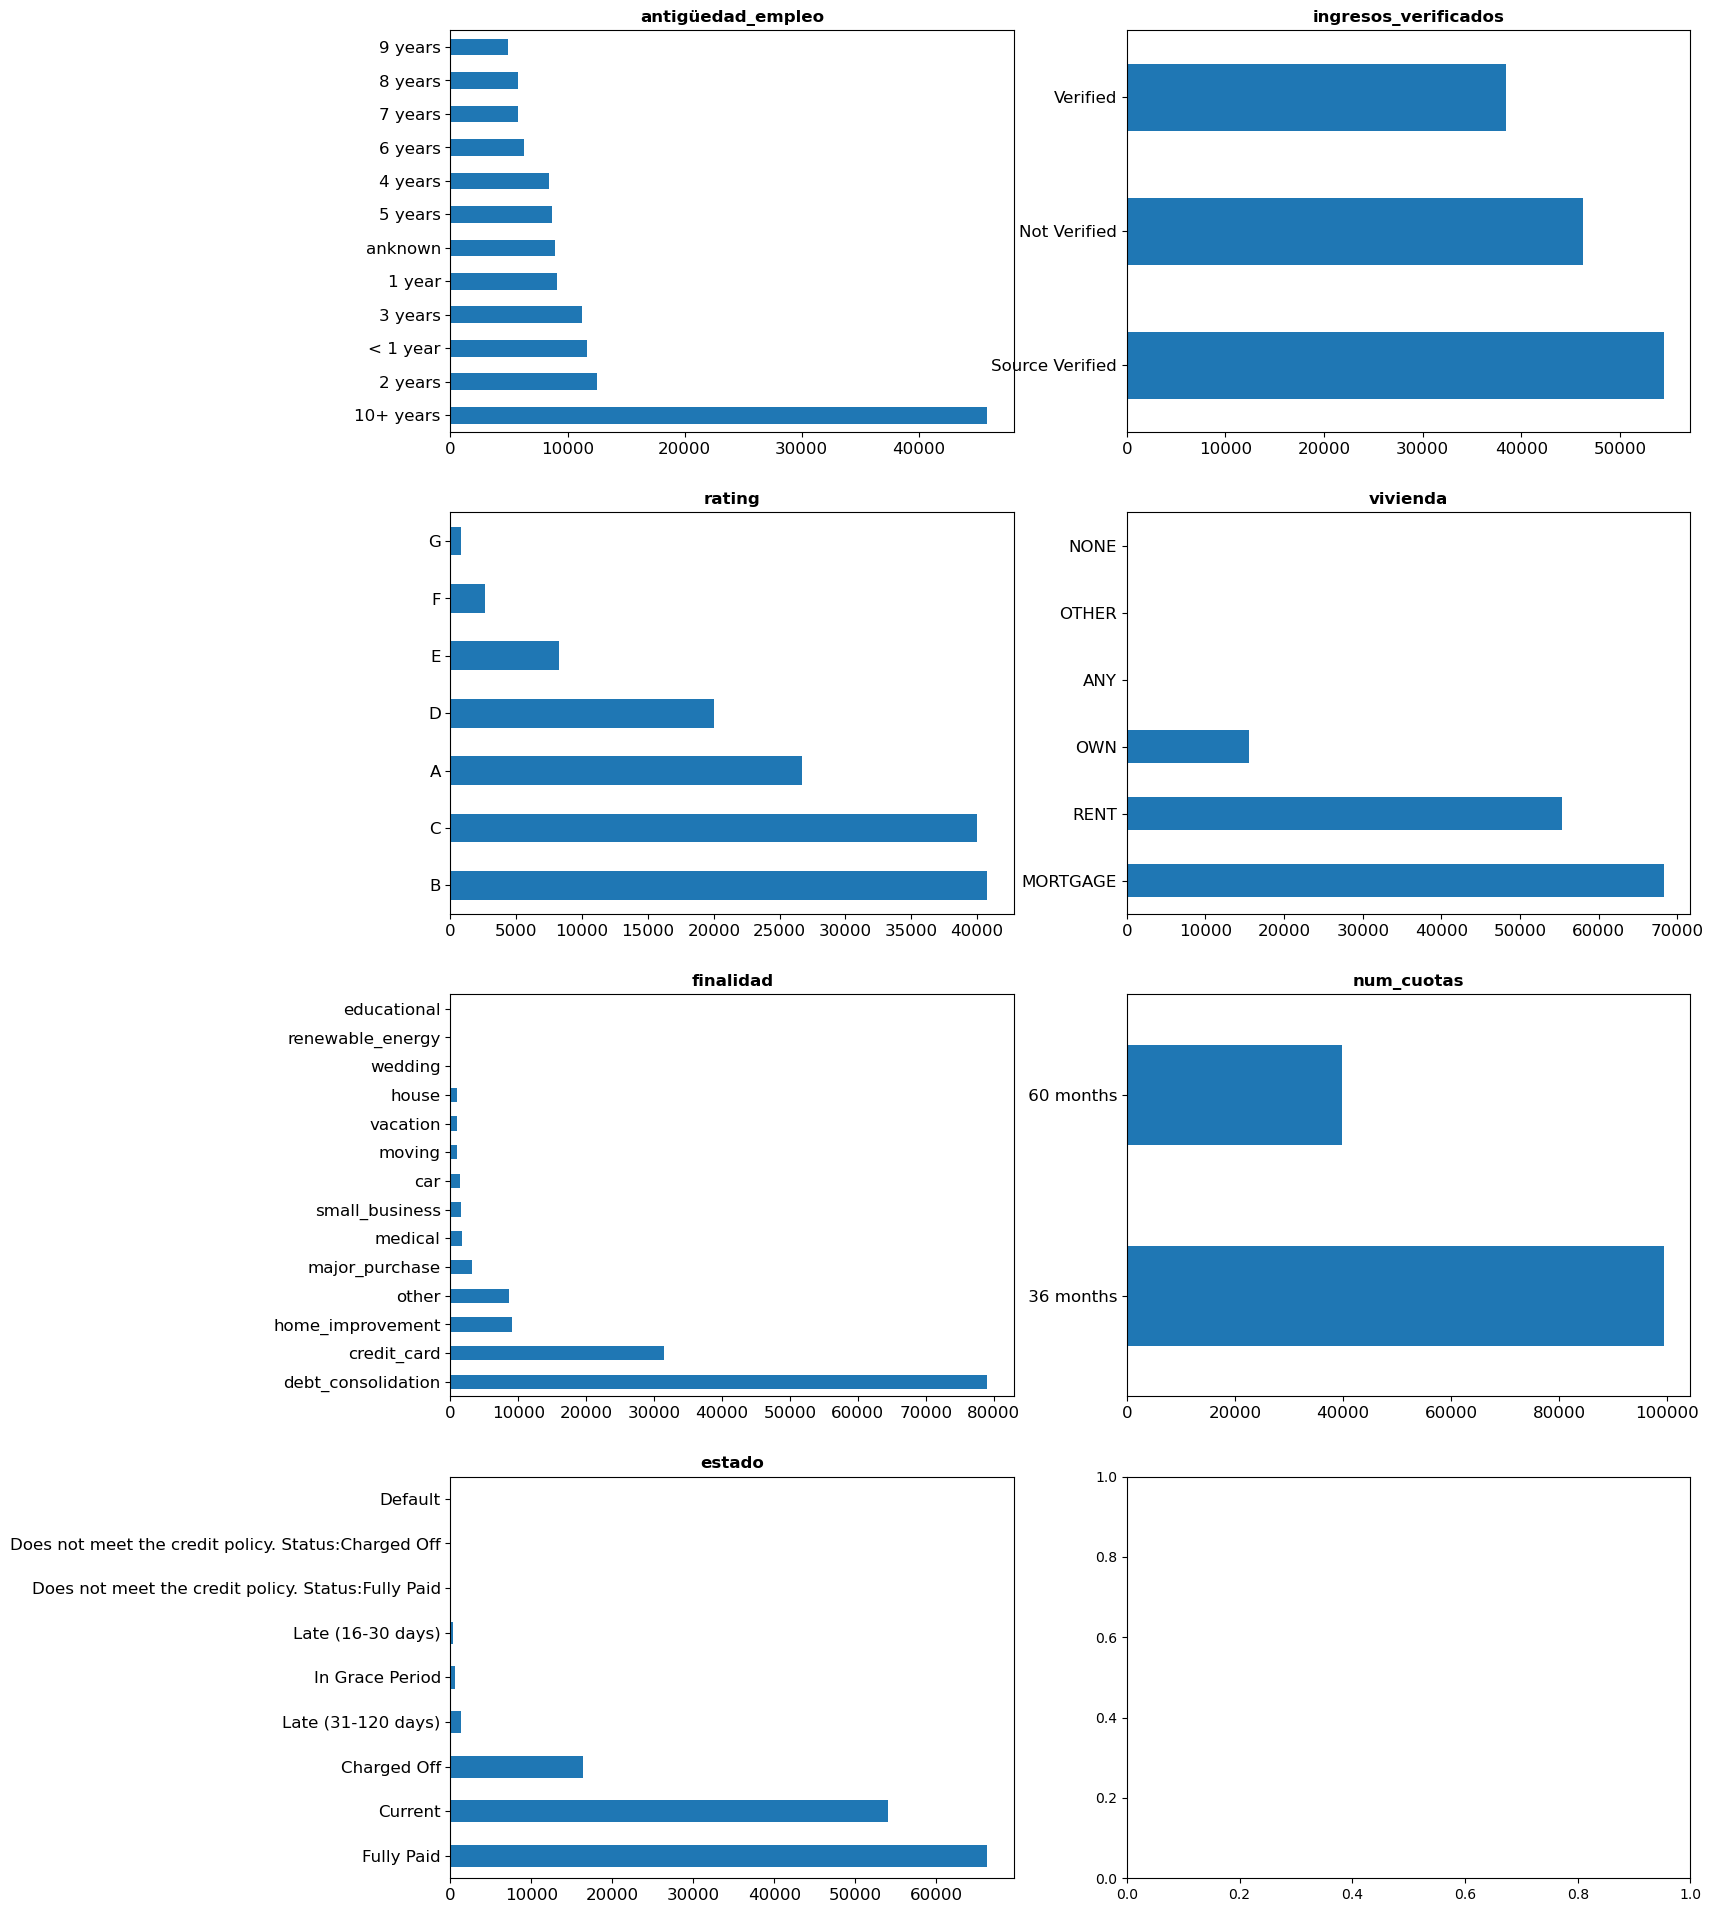

In [29]:
plot_eda_categoric(cat[variables])


Conclusiones:

En transformación:

En vivienda juntar ANY, NONE y OTHER a la categoria mayoritaria
En finalidad juntar renewable_energy, educational y wedding en 'otros'
Crear la target a partir de estado
Conclusions:

In transformation:

In housing join ANY, NONE and OTHER to the majority category
In order to join renewable_energy, educational and wedding in 'others'
Create target from state

## EDA NUMERICAL

In [30]:
def estatistical_count(num):
    #describe
    stats = num.describe().T
    #Add median
    stats['median'] = num.median()
    stats = stats.iloc[:,[0,1,8,2,3,4,5,6,7]]
    return(stats)

In [31]:
estatistical_count(num)

,count,mean,median,std,min,25%,50%,75%,max
ingresos,139108.0,75187.898418,65000.00,42314.382571,0.00,46000.0000,65000.00,92000.00,300000.00
dti,139108.0,18.864867,17.85,14.974836,-1.00,11.9800,17.85,24.47,999.00
num_hipotecas,139108.0,1.507275,1.00,1.876130,0.00,0.0000,1.00,2.00,27.00
num_lineas_credito,139108.0,11.597600,11.00,5.626933,0.00,8.0000,11.00,14.00,91.00
porc_tarjetas_75p,139108.0,41.029510,33.30,36.464870,0.00,0.0000,33.30,66.70,100.00
porc_uso_revolving,139108.0,50.322274,50.30,24.714741,0.00,31.6000,50.30,69.30,366.60
num_cancelaciones_12meses,139108.0,0.008555,0.00,0.102652,0.00,0.0000,0.00,0.00,5.00
num_derogatorios,139108.0,0.198802,0.00,0.574605,0.00,0.0000,0.00,0.00,46.00
num_meses_desde_ult_retraso,139108.0,16.766534,0.00,23.029595,0.00,0.0000,0.00,30.00,195.00
principal,139108.0,14983.787237,12800.00,9115.564599,500.00,8000.0000,12800.00,20000.00,40000.00


### Plot

In [32]:
def plot_eda_continuos(num):
    
    #rows
    from math import ceil
    rows = ceil(num.shape[1] / 2)

    #Plot
    f, ax = plt.subplots(nrows = rows, ncols = 2, figsize = (16, rows * 6))

    ax = ax.flat 
    for cada, variable in enumerate(num):
        num[variable].plot.density(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

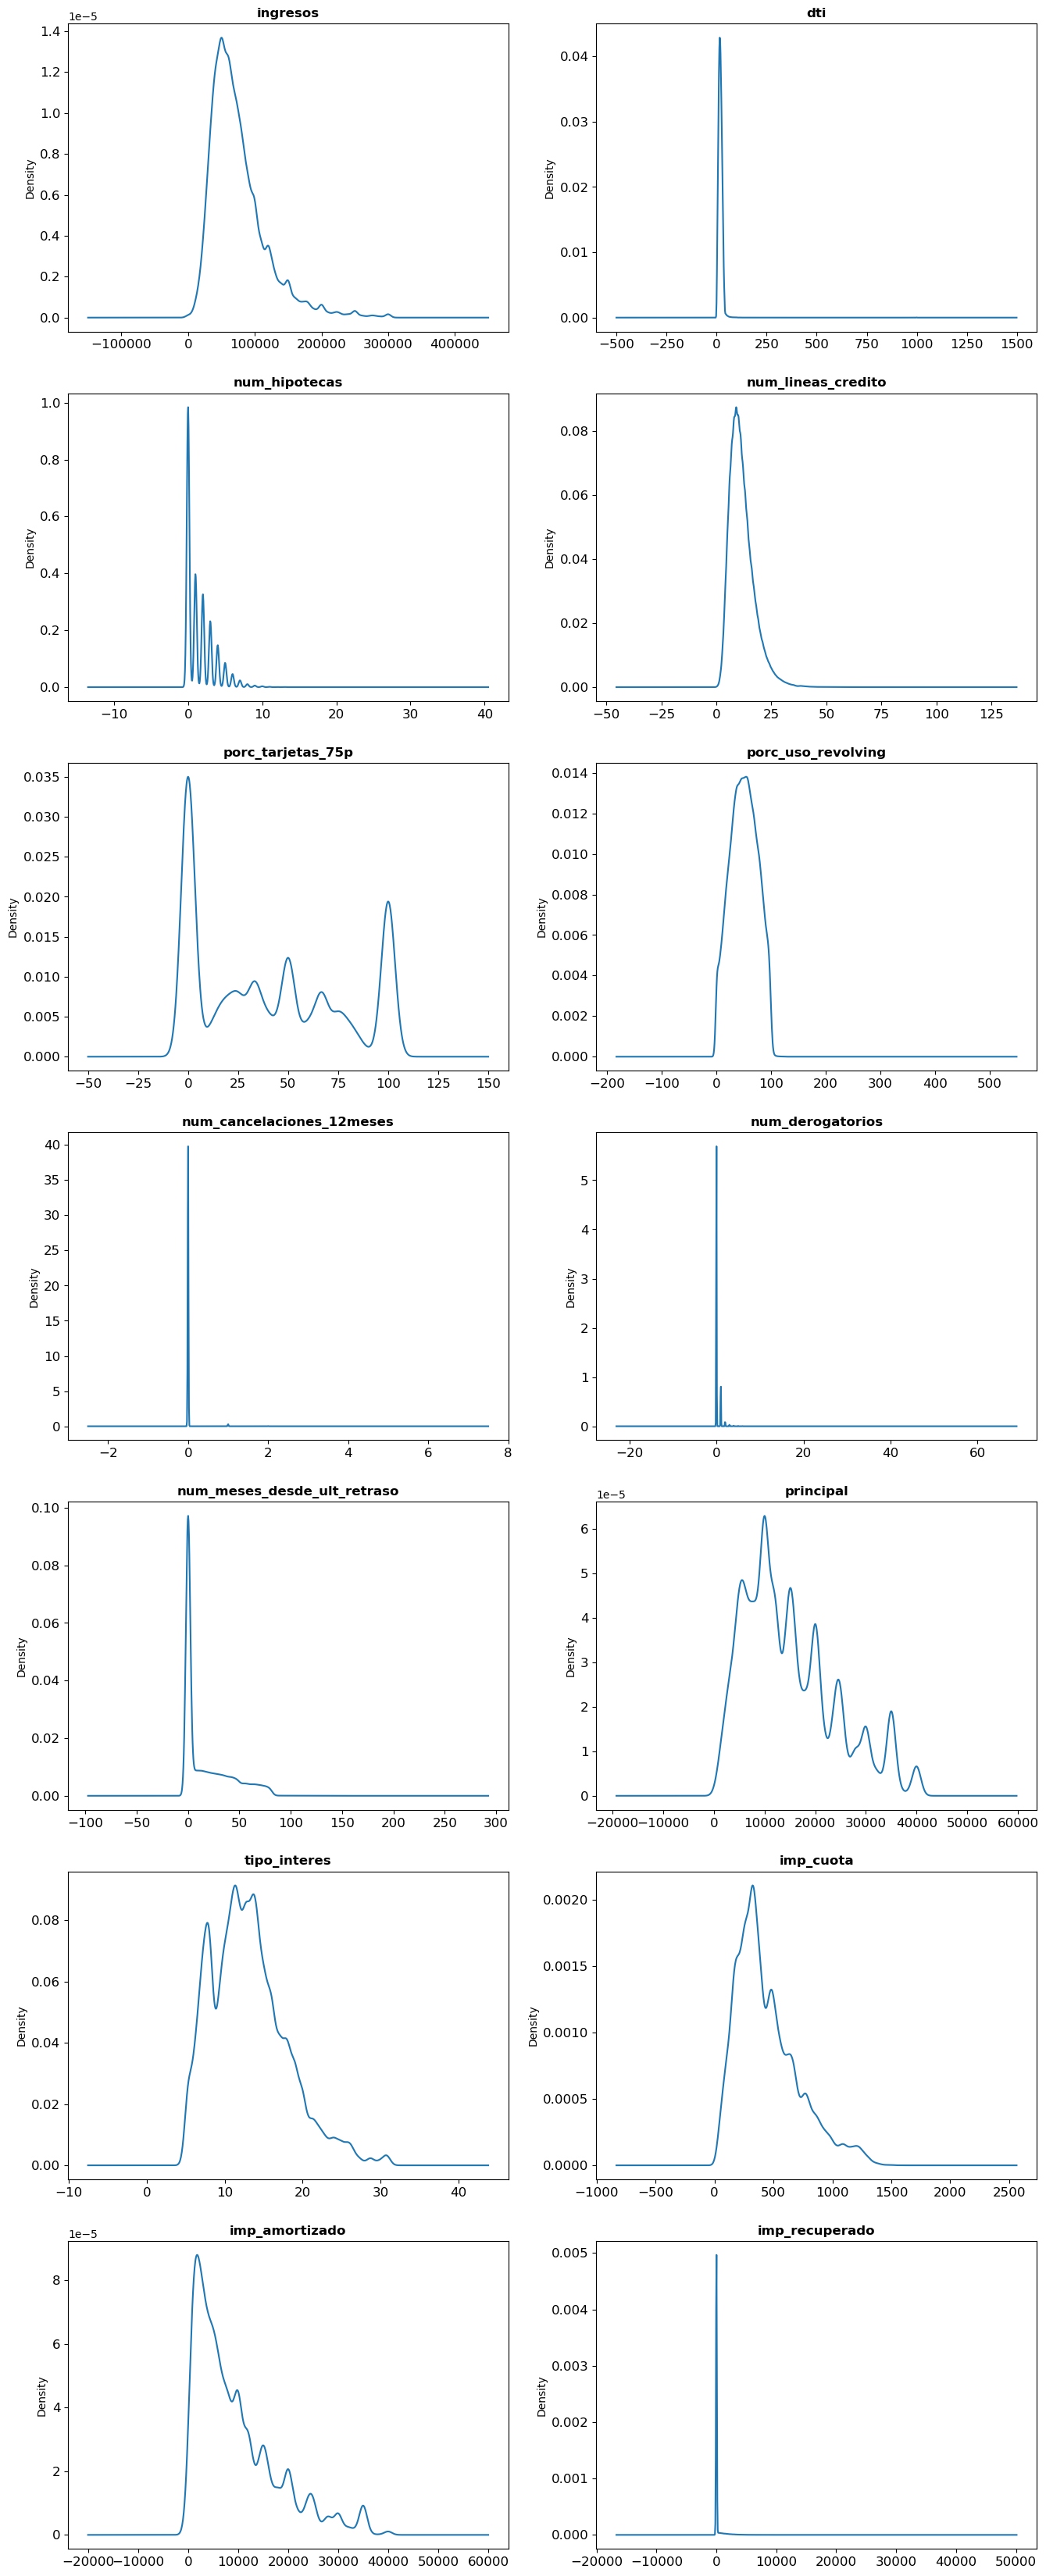

In [33]:
plot_eda_continuos(num)

We are going to analyze the detail of imp_amortizado and imp_recovered, since they are relevant for the target of the LGD model.

In [34]:
ratios = num[['principal','imp_amortizado','imp_recuperado']].copy()

In [35]:
ratios['r_amortizado_principal'] = ratios.imp_amortizado / ratios.principal
ratios['r_recuperado_principal'] = ratios.imp_recuperado / ratios.principal

In [36]:
ratios.describe().T

,count,mean,std,min,25%,50%,75%,max
principal,139108.0,14983.787237,9115.564599,500.0,8000.000000,12800.00000,20000.00,40000.000000
imp_amortizado,139108.0,9471.133947,8265.219364,0.0,3005.762500,7000.00000,13723.32,40000.000000
imp_recuperado,139108.0,145.707604,772.116112,0.0,0.000000,0.00000,0.00,33407.160000
r_amortizado_principal,139108.0,0.662311,0.369413,0.0,0.273985,0.87124,1.00,1.000032
r_recuperado_principal,139108.0,0.009046,0.041884,0.0,0.000000,0.00000,0.00,1.207635


Conclusions:

* In transformation convert num_derogatorios to binary
* Review in depth the relationship between status and imp_recovered

In [37]:
temp = cat[['estado']].merge(num[['imp_recuperado']], left_index=True, right_index=True)
temp.groupby('estado').imp_recuperado.mean()

estado
Charged Off                                            1235.365774
Current                                                   0.000000
Default                                                   0.000000
Does not meet the credit policy. Status:Charged Off     547.197455
Does not meet the credit policy. Status:Fully Paid        0.000000
Fully Paid                                                0.000000
In Grace Period                                           0.000000
Late (16-30 days)                                         0.000000
Late (31-120 days)                                        0.000000
Name: imp_recuperado, dtype: float64

Indeed, there is only amount recovered in the Charged Off state.

## SAVE DATASETS AFTER EDA

In [39]:
path_cat = path + '/02_Data/03_Work/' + 'cat_result_eda.pickle'
path_num = path + '/02_Data/03_Work/' + 'num_result_eda.pickle'

In [40]:
cat.to_pickle(path_cat)
num.to_pickle(path_num)